<a href="https://colab.research.google.com/github/itinasharma/DeepLearning/blob/main/mtl_x2_x3_pytorch_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

epoch    0 | total=7.686506 | x^2=3.707207 | x^3=9.391920
epoch  400 | total=0.025837 | x^2=0.006451 | x^3=0.034145
epoch  800 | total=0.002732 | x^2=0.001089 | x^3=0.003436
epoch 1200 | total=0.000765 | x^2=0.000412 | x^3=0.000916
epoch 1600 | total=0.000319 | x^2=0.000196 | x^3=0.000371


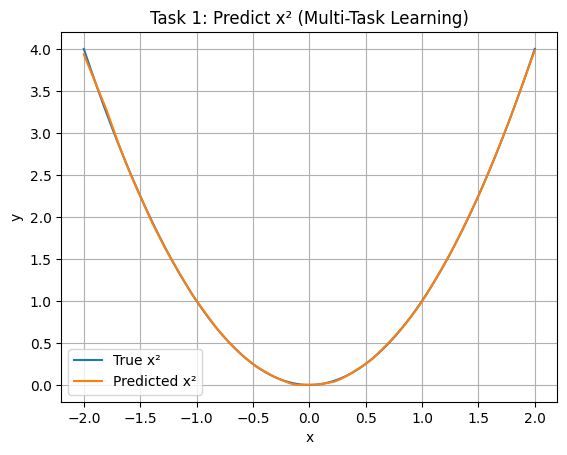

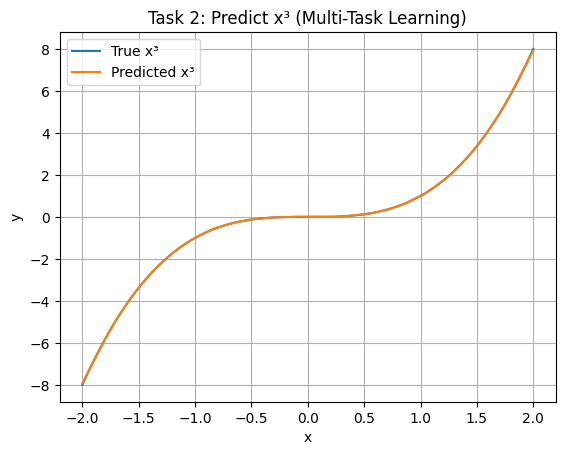

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


# ----------------------------
# Model
# ----------------------------
class XPowerMTL(nn.Module):
    def __init__(self, hidden_dim=32):
        super().__init__()

        # Shared backbone - learns "how x behaves"
        self.shared = nn.Sequential(
            nn.Linear(1, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU()
        )

        # Head 1: predicts x²
        self.head1 = nn.Linear(hidden_dim, 1)

        # Head 2: predicts x³
        self.head2 = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        h = self.shared(x)
        y1_hat = self.head1(h)
        y2_hat = self.head2(h)
        return y1_hat, y2_hat


# ----------------------------
# Data
# ----------------------------
torch.manual_seed(0)

x = torch.linspace(-2, 2, 200).unsqueeze(1)  # shape (200, 1)
y1 = x ** 2                                  # x^2
y2 = x ** 3                                  # x^3


# ----------------------------
# Training setup
# ----------------------------
model = XPowerMTL(hidden_dim=64)
mse = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

alpha = 0.3   # weight for x^2
beta = 0.7    # weight for x^3


# ----------------------------
# Training loop
# ----------------------------
model.train()
for epoch in range(2000):
    optimizer.zero_grad()

    y1_hat, y2_hat = model(x)

    loss1 = mse(y1_hat, y1)
    loss2 = mse(y2_hat, y2)

    loss = alpha * loss1 + beta * loss2

    loss.backward()
    optimizer.step()

    if epoch % 400 == 0:
        print(
            f"epoch {epoch:4d} | total={loss.item():.6f} | "
            f"x^2={loss1.item():.6f} | x^3={loss2.item():.6f}"
        )


# ----------------------------
# Plot results
# ----------------------------
model.eval()
with torch.no_grad():
    y1_pred, y2_pred = model(x)

x_np = x.squeeze().numpy()

# Plot x^2
plt.figure()
plt.title("Task 1: Predict x² (Multi-Task Learning)")
plt.plot(x_np, y1.squeeze().numpy(), label="True x²")
plt.plot(x_np, y1_pred.squeeze().numpy(), label="Predicted x²")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

# Plot x^3
plt.figure()
plt.title("Task 2: Predict x³ (Multi-Task Learning)")
plt.plot(x_np, y2.squeeze().numpy(), label="True x³")
plt.plot(x_np, y2_pred.squeeze().numpy(), label="Predicted x³")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

plt.show()
